<a href="https://colab.research.google.com/github/Yxy-0/TAM_2025-2S/blob/main/Cuaderno8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje no supervisado - reducción de dimensión

- Se presentan los conceptos y simulaciones básicas relacionadas con técnicas clásicas lineales y no lineales de reducción de dimensión.

## Análisis de componentes de principales - Principal Component Analysis (PCA)

![gifpca](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*TXIbCytfgo5p5hty.gif)


- PCA busca un espacio de menor dimensión que preserve la mayor cantidad de variabilidad posible desde el espacio original (alta dimensión).

- Desde una perspectiva generativa, PCA asume que los datos $\mathbf{X} \in \mathbb{R}^{N \times P}$ son generados desde un espacio de baja dimensión (espacio latente) $\mathbf{Z} \in \mathbb{R}^{N \times M}$, donde $M < P$:

\begin{equation}
\mathbf{X} = \mathbf{Z} \mathbf{W}^T,
\end{equation}

- $\mathbf{Z}=\mathbf{X}\mathbf{W}$: matriz de baja dimensión.
- $\mathbf{W} \in \mathbb{R}^{P \times M}$: componentes principales (loading vectors).

El problema de optimización desde el punto de vista generativo:

\begin{align}
\mathbf{W}^*=&\arg\min_\mathbf{W} \|\mathbf{X}-\mathbf{Z} \mathbf{W}^T\|_F \\
   \text{s.t.} & \quad \mathbf{W}\mathbf{W}^\top  = \mathbf{I}
\end{align}



- PCA también puede resolverse maximizando la varianza de los datos proyectados.

- Asumiendo datos centralizados $\mathbf{X}$, la covarianza $\mathbf{\Sigma}\in \mathbb{R}^{P \times P}$ se define como:

\begin{equation}
\mathbf{\Sigma} = \frac{1}{N} \mathbf{X}^T \mathbf{X}.
\end{equation}

- El problema de optimización de PCA se puede reescribir como:

\begin{align}
\mathbf{W}^*=&\arg\max_\mathbf{W} \text{tr}(\mathbf{W}^T \mathbf{\Sigma} \mathbf{W}),\\
 \text{s.t.} & \quad \mathbf{W}\mathbf{W}^\top  = \mathbf{I}
\end{align}


- La solución del problema se centra en los $M$ vectores propios de la matriz de covarianza, correspodiente a los $M$ valores propios más altos.

- Ver la demostración [PCA generativo a PCA por varianza](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf).


**Ejemplo:** Construyamos un conjunto de datos 3D del famoso dato sintético rollo Suizo - Swiss Roll.

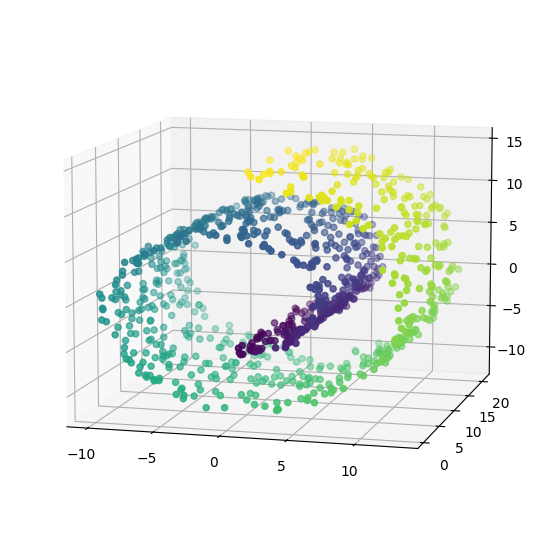

In [ ]:
from sklearn.datasets import make_swiss_roll
import numpy as np
import matplotlib.pyplot as plt

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
#t contiene el orden estructural de los datos
#crear scatter en 3D
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0], X[:,1], X[:,2],c=t)
ax.view_init(elev=10, azim=-75)
plt.show()

**NOTA:** PCA supone que el conjunto de datos se centra en el origen. Como veremos, las clases de PCA de Scikit-Learn se encargan de centrar los datos por usted. Sin embargo, si implementa PCA usted mismo, o si usa otras bibliotecas, **no olvide centrar los datos primero**, incluso considere aplicar normalización zscore.

**Usando PCA de scikit-learn**

-La clase PCA de Scikit-Learn implementa PCA usando la descomposición espectral (EIG y SVD).

-El siguiente código aplica PCA para reducir la dimensionalidad del conjunto de datos a dos dimensiones (tenga en cuenta que automáticamente se encarga de centrar los datos):

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
Y2D = pca.fit_transform(X)

- El hiperparámetro `n_components` puede ser un número entero (número de dimensiones o componentes $M\leq P$) o un valor en el intervalo [0,1] para cuantificar el número de componentes requerido para preservar una varianza retenida dada.

Tenga en cuenta que ejecutar PCA varias veces en conjuntos de datos ligeramente diferentes puede generar espacios latentes distintos. En general, la única diferencia es que algunos ejes pueden voltearse.

**Nota**: el problema de optimización de PCA que incluye costo y restricciones cuadráticas, da como resultado un problema no convexo.

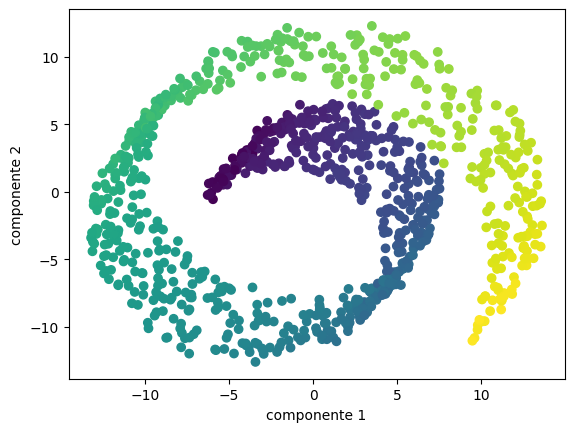

In [ ]:
plt.scatter(Y2D[:,0],Y2D[:,1],c=t)
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.show()

Ahora vamos a recuperar los puntos 3D proyectados en el plano (subespacio PCA 2D).

In [ ]:
X3D_inv = pca.inverse_transform(Y2D)

Por supuesto, **hubo cierta pérdida de información durante el paso de proyección**, por lo que los puntos 3D recuperados *no son exactamente iguales a los puntos 3D originales*:

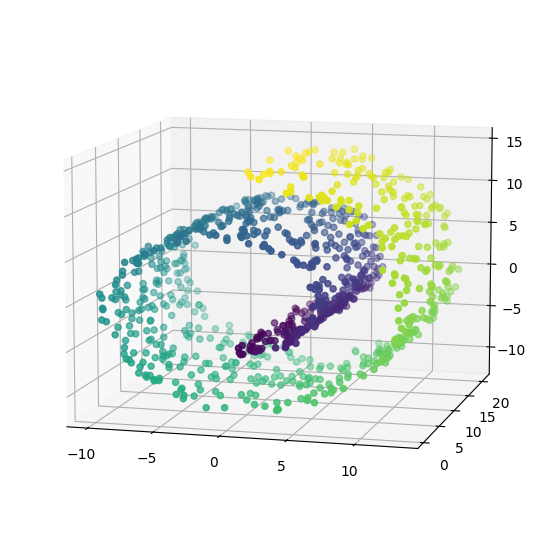

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X3D_inv[:,0], X3D_inv[:,1], X3D_inv[:,2],c=t)
ax.view_init(elev=10, azim=-75)
plt.show()

Podemos calcular el error de reconstrucción:

In [ ]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

np.float64(4.751275566890726e-29)

Las reconstrucciones de ambos métodos **no son idénticas** porque la clase PCA de Scikit-Learn se encarga automáticamente de revertir el centrado medio, *pero si restamos la media, obtenemos la misma reconstrucción*.

El objeto PCA da acceso a los componentes principales que calculó:

In [ ]:
pca.components_

array([[ 0.56791312,  0.15670748,  0.80803308],
       [ 0.77712377,  0.2213858 , -0.5891239 ],
       [-0.27120717,  0.96251291,  0.00394679]])

# Ejercicio 1

- Presente el problema de optimización de PCA como un algoritmo generativo (reconstrucción o filtrado de datos), y compare el problema de optimización desde el punto de vista generativo vs. preservación de la varianza. (Ver [material de apoyo PCA](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf)).



# **SOLUCIÓN 1 — Análisis de Componentes Principales (PCA)**

El problema de optimización de **PCA** puede abordarse desde **dos perspectivas equivalentes**:

1. **Como un modelo generativo o de reconstrucción**, que busca minimizar el error de reconstrucción de los datos.  
2. **Como un modelo de preservación de la varianza**, que busca maximizar la información retenida en el subespacio proyectado.

A continuación se desarrollan ambos enfoques y su relación.



## **1. Enfoque generativo (reconstrucción o filtrado de datos)**

Desde el punto de vista generativo, **PCA** busca encontrar una matriz de componentes principales  
$$\mathbf{W} \in \mathbb{R}^{p \times M}$$  
que permita reconstruir los datos originales  
$$\mathbf{X} \in \mathbb{R}^{N \times p}$$  
a partir de una representación de menor dimensión  
$$\mathbf{Z} \in \mathbb{R}^{N \times M}.$$

El modelo generativo de PCA se basa en la reconstrucción:

$$
\hat{\mathbf{X}} = \mathbf{Z}\mathbf{W}^\top,
\quad \text{donde} \quad
\mathbf{Z} = \mathbf{XW}.
$$

El objetivo es **minimizar el error cuadrático medio de reconstrucción**, dado por:

$$
\mathbf{W}^* =
\arg\min_\mathbf{W}
\|\mathbf{X} - \mathbf{Z}\mathbf{W}^\top\|_F^2,
\quad
\text{s.a.} \quad
\mathbf{W}\mathbf{W}^\top = \mathbf{I}.
$$

donde:

- $\|\cdot\|_F$ denota la **norma de Frobenius**, que mide el error total de reconstrucción.  
- La restricción $\mathbf{W}\mathbf{W}^\top = \mathbf{I}$ garantiza que las columnas de $\mathbf{W}$ sean **ortonormales**.

En este sentido, el modelo generativo de PCA busca encontrar un subespacio de baja dimensión que permita **reconstruir los datos originales con la mínima pérdida de información posible**.



## **2. Enfoque de preservación de la varianza**

Desde el punto de vista de **preservación de la varianza**, PCA busca encontrar una matriz $\mathbf{W}$ que **maximice la varianza** de los datos proyectados $\mathbf{Z} = \mathbf{XW}$.

El problema de optimización se formula como:

$$
\mathbf{W}^* = \arg\max_\mathbf{W}
\text{tr}(\mathbf{W}^\top \mathbf{\Sigma} \mathbf{W}),
\quad
\text{s.a.} \quad
\mathbf{W}\mathbf{W}^\top = \mathbf{I},
$$

donde $\mathbf{\Sigma}$ es la **matriz de covarianza** de los datos centrados:

$$
\mathbf{\Sigma} = \frac{1}{N}(\mathbf{X} - \bar{\mathbf{X}})^\top(\mathbf{X} - \bar{\mathbf{X}}).
$$

Maximizar $\text{tr}(\mathbf{W}^\top \mathbf{\Sigma} \mathbf{W})$ equivale a encontrar las direcciones (columnas de $\mathbf{W}$) en las que los datos tienen **mayor dispersión**, es decir, **mayor información estadística**.



## **3. Equivalencia entre ambos enfoques**

Aunque los dos enfoques están formulados de manera distinta —uno como un problema de **minimización** (error de reconstrucción) y otro como uno de **maximización** (varianza proyectada)—, ambos son **matemáticamente equivalentes**.

Al desarrollar el término del error de reconstrucción, se obtiene que:

$$
\min_\mathbf{W} \|\mathbf{X} - \mathbf{XWW}^\top\|_F^2
\;\; \Leftrightarrow \;\;
\max_\mathbf{W} \text{tr}(\mathbf{W}^\top \mathbf{\Sigma} \mathbf{W}),
$$

ya que los términos independientes de $\mathbf{W}$ no afectan la optimización.  
Por lo tanto, minimizar la pérdida de reconstrucción equivale a **maximizar la varianza retenida**.



## **4. Solución del problema**

La solución de ambos problemas se obtiene resolviendo el **problema de autovalores** de la matriz de covarianza:

$$
\mathbf{\Sigma} \mathbf{w}_i = \lambda_i \mathbf{w}_i,
$$

donde:

- $\lambda_i$ son los **valores propios** (eigenvalores), que representan la **varianza explicada** por cada componente.  
- $\mathbf{w}_i$ son los **vectores propios** (autovectores), que definen las direcciones de máxima varianza.

Los $M$ autovectores correspondientes a los **mayores autovalores** forman las columnas de la matriz óptima $\mathbf{W}$.

Cada autovalor $\lambda_i$ indica cuánta **varianza** del conjunto de datos es explicada por su respectiva componente principal.



## **5. Resumen comparativo**

| Perspectiva | Objetivo | Formulación | Interpretación |
|--------------|-----------|--------------|----------------|
| **Generativo (reconstrucción o filtrado)** | Minimizar el error de reconstrucción | $$\displaystyle \min_\mathbf{W} \|\mathbf{X} - \mathbf{XWW}^\top\|_F^2$$ | Encuentra las direcciones que mejor permiten reconstruir los datos originales con mínima pérdida. |
| **Preservación de la varianza** | Maximizar la varianza de los datos proyectados | $$\displaystyle \max_\mathbf{W} \text{tr}(\mathbf{W}^\top \mathbf{\Sigma} \mathbf{W})$$ | Encuentra las direcciones donde los datos tienen mayor dispersión (información). |

En conclusión, los dos enfoques de PCA —**reconstrucción generativa** y **preservación de la varianza**— son **equivalentes** y conducen a la misma solución matemática, ambos buscan identificar un subespacio de menor dimensión que conserve la **máxima cantidad de información posible** de los datos originales.

La matriz óptima $\mathbf{W}$ está compuesta por los **autovectores asociados a los mayores autovalores** de la matriz de covarianza $\mathbf{\Sigma}$.  
Estos autovalores $\lambda_i$ representan la **varianza explicada** por cada componente principal.

El ( [material de apoyo PCA](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf)) nos muestra detalladamente la demostración de esta equivalencia paso a paso.


### Varianza retenida (explicada)

- El valor propio relacionado con cada compoenente, codifica la varianza retenida del espacio de entrada.

Por ejemplo, veamos las razones de varianza explicadas de los dos primeros componentes del conjunto de datos 3D representados

In [ ]:
pca.explained_variance_ratio_

array([0.40782396, 0.3020019 , 0.29017414])


Esto le indica que **el 40.8% de la varianza del conjunto de datos se encuentra a lo largo del primer eje**, y el **30.2% se encuentra a lo largo del segundo eje**.

### Determinar el número de dimensiones proyectas

El siguiente código calcula PCA sin reducir la dimensionalidad, luego calcula el número mínimo de dimensiones requeridas para preservar el 95% de la variación del conjunto de entrenamiento (se utilizará la base de datos Mnist que tiene 784 dimensiones de entrada).

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

mnist = keras.datasets.mnist #cargar fashion mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train.reshape(X_train.shape[0], -1)/255.
y = y_train

print(X.shape,y.shape)

(60000, 784) (60000,)


In [ ]:
#se submuestrea para facilidad en cálculos
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.98,random_state=123)
print(X_train.shape,y_train.shape)

(1200, 784) (1200,)


In [ ]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d      = np.argmax(cumsum >= 0.95) + 1 #varianza acumulada ordenando componentes
d

np.int64(135)

También podemos establecer *n_components = d* y ejecutar PCA nuevamente. Sin embargo, hay una opción mucho mejor: en lugar de especificar el número de componentes principales que desea conservar, puede establecer *n_components* para que sea flotante entre 0.0 y 1.0, lo que indica la relación de varianza que desea conservar:

In [ ]:
pca       = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

np.int64(135)

In [ ]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9503404973326779)

- Otra opción más es **trazar la varianza explicada en función del número de dimensiones** (simplemente trazar *cumsum*; ver Figura a continuación).

- Por lo general, habrá un codo en la curva, donde la variación explicada deja de crecer rápidamente. Puede pensar en esto como la dimensionalidad intrínseca del conjunto de datos.

- En este caso, puede ver que reducir la dimensionalidad a unas 100 dimensiones no perdería demasiada varianza explicada.

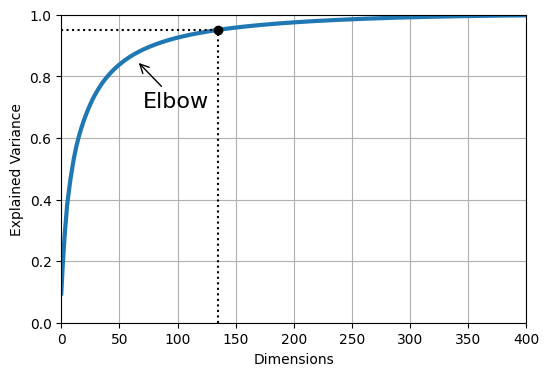

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
#save_fig("explained_variance_plot")
plt.show()

### PCA para compresión de datos

 **Ejemplo:** intentemos aplicar PCA al conjunto de datos MNIST mientras conserva el $95\%$ de su varianza.

Debería encontrar que cada instancia tendrá un poco más de $150$ características, en lugar de las características $784$ originales.

In [ ]:
pca       = PCA(n_components=0.95)
X_train = np.array(X_train)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

np.int64(135)

- Entonces, aunque se conserva la mayor parte de la variación, ¡el conjunto de datos ahora es inferior al $20\%$ de su tamaño original!.

- Esta es una relación de compresión razonable, y podemos ver cómo esto puede acelerar enormemente un algoritmo de clasificación (como un clasificador SVM).

**Ejemplo:** En el siguiente código se comprime el conjunto de datos MNIST a $154$ dimensiones, luego usa el método *inverse_transform()* para descomprimirlo nuevamente a $784$ dimensiones. La  siguiente Figura muestra algunos dígitos del conjunto de entrenamiento original (a la izquierda) y los dígitos correspondientes después de la compresión y descompresión. Puede ver que hay una ligera pérdida de calidad de imagen, pero los dígitos aún están casi intactos.

(30, 784)
(30, 784)


Text(0.5, 1.0, 'Compressed')

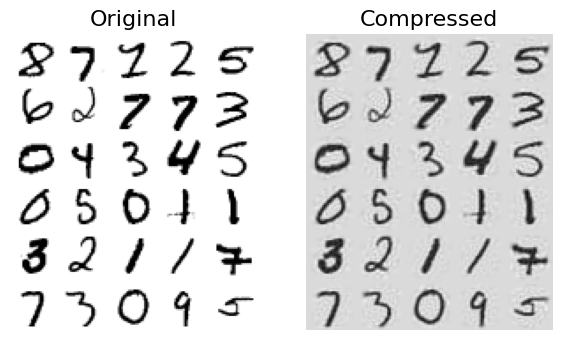

In [ ]:
import matplotlib as mpl

pca         = PCA(n_components = 154)
X_reduced   = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

def plot_digits(instances, images_per_row=5, **options):
    size           = 28
    images_per_row = min(len(instances), images_per_row)
    print(instances.shape)
    images         = [instance.reshape(size,size) for instance in instances]
    n_rows         = (len(instances) - 1) // images_per_row + 1
    row_images     = []
    n_empty        = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::40])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::40])
plt.title("Compressed", fontsize=16)
#save_fig("mnist_compression_plot")

In [ ]:
rnd_pca   = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

### Kernel PCA

- El algoritmo Kernel PCA permite calcular los componentes principales a partir de un mapeo no lineal basado en funciones núcleo.

- En KPCA los datos en $\mathbf{X}$ son mapeados a un espacio de alta dimensión desde la función $\phi: \mathbb{R}^P \to \mathscr{F}$.

- Luego, se encuentran los componentes principales sobre la matriz kernel $\mathbf{K}\in \mathbb{R}^{N \times N}$, con $K_{nn'} = \kappa(\mathbf{x}_n,\mathbf{x}_{n'})=\langle \phi(\mathbf{x}_n),\phi(\mathbf{x}_{n'})\rangle$.


\begin{equation}
\mathbf{K} \boldsymbol{\alpha} = \lambda \boldsymbol{\alpha},
\end{equation}


- Para encontrar la proyección de los datos:

\begin{equation}
\mathbf{z}_n = \sum_{n'=1}^N \alpha_{n'} \kappa(\mathbf{x}_n, \mathbf{x}_{n'}), \quad n = 1, 2, \ldots, N,
\end{equation}






# Ejercicio 2

- Presente un paralelo entre el problema de optimización de PCA y el de Kernel PCA.


# **Solucion 2: Paralelo entre el problema de optimización de PCA y Kernel PCA**

El **Análisis de Componentes Principales (PCA)** y su extensión **Kernel PCA** comparten el mismo objetivo fundamental:  
**encontrar una representación de los datos en un espacio de menor dimensión que preserve la mayor cantidad de información posible**.  

Sin embargo, difieren en **el espacio donde se realiza la optimización** y en **la forma de representar la relación entre los datos**.



## **1. PCA (Análisis de Componentes Principales) — Enfoque lineal**

El PCA clásico busca encontrar una proyección lineal de los datos originales que:

- **Minimiza el error de reconstrucción**, o de manera equivalente,  
- **Maximiza la varianza** de los datos proyectados.

### **Formulación del problema**

Dado un conjunto de datos centrados  
$$\mathbf{X} \in \mathbb{R}^{N \times p},$$  
PCA busca una matriz de proyección  
$$\mathbf{W} \in \mathbb{R}^{p \times M}$$  
que maximiza la varianza de los datos proyectados:

$$
\mathbf{W}^* =
\arg\max_\mathbf{W}
\text{tr}(\mathbf{W}^\top \mathbf{\Sigma} \mathbf{W}),
\quad
\text{s.a. } \mathbf{W}^\top \mathbf{W} = \mathbf{I},
$$

donde $\mathbf{\Sigma} = \frac{1}{N} \mathbf{X}^\top \mathbf{X}$ es la matriz de covarianza de los datos.

La solución se obtiene resolviendo el **problema de autovalores**:

$$
\mathbf{\Sigma} \mathbf{w}_i = \lambda_i \mathbf{w}_i,
$$

donde los **autovectores asociados a los mayores autovalores** definen las direcciones de máxima varianza.



## **2. Kernel PCA — Enfoque no lineal**

El **Kernel PCA** extiende el PCA clásico a un espacio de características **no lineal** utilizando una **función núcleo (kernel)**.  
El objetivo sigue siendo el mismo: **encontrar las direcciones de máxima varianza**, pero ahora **en un espacio transformado** mediante una función $\phi(\cdot)$.

### **Transformación a espacio de características**

Cada muestra $\mathbf{x}_i$ se mapea a un espacio (posiblemente de dimensión infinita):

$$
\phi: \mathbb{R}^p \rightarrow \mathcal{H},
\quad \mathbf{x}_i \mapsto \phi(\mathbf{x}_i),
$$

donde $\mathcal{H}$ es un espacio de Hilbert de alta (o infinita) dimensión.



### **Problema de optimización de Kernel PCA**

En el espacio transformado, se busca un vector de dirección $\mathbf{w}$ que maximice la varianza proyectada de los datos transformados:

$$
\max_\mathbf{w}
\frac{1}{N} \sum_{i=1}^{N}
(\mathbf{w}^\top \phi(\mathbf{x}_i))^2,
\quad
\text{s.a. } \|\mathbf{w}\|^2 = 1.
$$



### **Uso del truco del kernel**

En lugar de calcular explícitamente $\phi(\mathbf{x})$, se utiliza una **función kernel**:

$$
k(\mathbf{x}_i, \mathbf{x}_j) = \langle \phi(\mathbf{x}_i), \phi(\mathbf{x}_j) \rangle,
$$

y se construye la **matriz kernel** centrada:

$$
\mathbf{K}_{ij} = k(\mathbf{x}_i, \mathbf{x}_j).
$$

El problema de optimización se convierte en:

$$
\mathbf{K} \boldsymbol{\alpha}_i = N \lambda_i \boldsymbol{\alpha}_i,
$$

donde $\boldsymbol{\alpha}_i$ son los **autovectores** de la matriz kernel, y los **autovalores** $\lambda_i$ representan la varianza explicada por cada componente no lineal.



## **3. Relación entre PCA y Kernel PCA**

| Aspecto | PCA | Kernel PCA |
|----------------------|----------------------|------------------------|
| **Tipo de proyección** | Lineal | No lineal (implícita en el espacio de características) |
| **Espacio de trabajo** | Espacio original de los datos $\mathbb{R}^p$ | Espacio de características $\mathcal{H}$ definido por el kernel |
| **Función objetivo** | $$\max_\mathbf{W} \text{tr}(\mathbf{W}^\top \mathbf{\Sigma} \mathbf{W})$$ | $$\max_{\boldsymbol{\alpha}} \boldsymbol{\alpha}^\top \mathbf{K} \boldsymbol{\alpha}$$ |
| **Restricción** | $\mathbf{W}^\top \mathbf{W} = \mathbf{I}$ | $\boldsymbol{\alpha}^\top \mathbf{K} \boldsymbol{\alpha} = 1$ |
| **Ecuación característica** | $\mathbf{\Sigma} \mathbf{w}_i = \lambda_i \mathbf{w}_i$ | $\mathbf{K} \boldsymbol{\alpha}_i = N\lambda_i \boldsymbol{\alpha}_i$ |
| **Datos transformados** | $\mathbf{Z} = \mathbf{XW}$ | $\mathbf{Z} = \mathbf{K}\boldsymbol{\alpha}$ |
| **Captura de relaciones** | Lineales | No lineales, mediante el kernel |
| **Ejemplo de kernel** | — | RBF, polinomial, sigmoide, etc. |



## **4. Interpretación conceptual**

- En **PCA**, se buscan las **direcciones lineales** que mejor explican la varianza de los datos.  
- En **Kernel PCA**, se aplican **transformaciones no lineales** (a través del kernel) que permiten capturar **estructuras complejas** y **relaciones no lineales** entre las variables.  

Ambos métodos comparten la misma esencia: **proyectar los datos en un subespacio de máxima varianza**, pero Kernel PCA lo hace en un **espacio de mayor (posiblemente infinita) dimensión** sin necesidad de calcularlo explícitamente.



## **5. Conclusión**

El **PCA clásico** es una técnica lineal que busca direcciones ortogonales de máxima varianza,  
mientras que el **Kernel PCA** extiende este principio al ámbito no lineal mediante funciones kernel.

Ambos resuelven **problemas de autovalores**, pero en espacios distintos:

$$
\text{PCA: } \quad \mathbf{\Sigma} \mathbf{w}_i = \lambda_i \mathbf{w}_i
\quad \Rightarrow \quad
\text{espacio de los datos.}
$$

$$
\text{Kernel PCA: } \quad \mathbf{K} \boldsymbol{\alpha}_i = N\lambda_i \boldsymbol{\alpha}_i
\quad \Rightarrow \quad
\text{espacio de características.}
$$

En resumen, **Kernel PCA generaliza PCA**, permitiendo capturar estructuras no lineales y proporcionando una representación más flexible y potente de los datos.


**Ejemplo:** el siguiente código utiliza la clase *KernelPCA* de Scikit-Learn para realizar kPCA con un kernel RBF.

- Se utilizará el swiss-roll para facilitar la visualización.

In [ ]:
from sklearn.decomposition import KernelPCA

#se ilustra nuevamente sobre swiss roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)


rbf_pca   = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

- Ahora se comparan tres kernels distintos para encontrar la proyección de los datos:

<>:9: SyntaxWarning: invalid escape sequence '\g'
<>:9: SyntaxWarning: invalid escape sequence '\g'
<>:9: SyntaxWarning: invalid escape sequence '\g'
<>:9: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipython-input-1780369582.py:9: SyntaxWarning: invalid escape sequence '\g'
  for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
/tmp/ipython-input-1780369582.py:9: SyntaxWarning: invalid escape sequence '\g'
  for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):


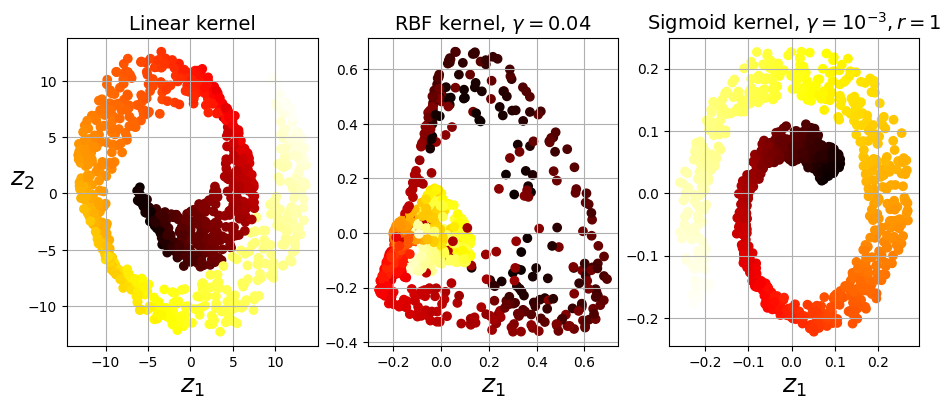

In [ ]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9
plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced

    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
#save_fig("kernel_pca_plot")
plt.show()

La Figura muestra el rollo suizo, reducido a dos dimensiones usando un núcleo lineal (equivalente a simplemente usar la clase *PCA*), un núcleo RBF y un núcleo sigmoide (Logístico).

### kPCA: Definiendo el kernel y sus hiperparámetros

- Como kPCA es un algoritmo de aprendizaje no supervisado, *no existe una medida de rendimiento obvia para ayudarlo a seleccionar los mejores valores de kernel e hiperparámetros*.

- Sin embargo, la reducción de dimensionalidad es a menudo un paso de preparación para una tarea de aprendizaje supervisada (por ejemplo, clasificación), por lo que simplemente puede usar la **búsqueda de cuadrícula** para seleccionar el núcleo y los hiperparámetros conducen al mejor rendimiento en esa tarea.

**Ejemplo:** el siguiente código crea una guía de dos pasos para la clasificación de la base de datos Mnist.

- Primero reduciendo la dimensionalidad a dos dimensiones usando kPCA, luego aplicando Regresión logística para la clasificación.

- Se utiliza *GridSearchCV* para encontrar el mejor valor de kernel y gamma para kPCA para obtener la mejor precisión de clasificación al final de la guía:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

Los mejores kernels e hiperparámetros están disponibles a través de la variable *best_params_*:

In [ ]:
print(grid_search.best_params_)

{'kpca__gamma': np.float64(0.03), 'kpca__kernel': 'rbf'}


**Tal vez se pregunte cómo realizar la reconstrucción de una instancia proyectada con kPCA?**.

- Una solución es entrenar un modelo de regresión supervisado, con las instancias proyectadas como el conjunto de entrenamiento y las instancias originales como los objetivos.

- Scikit-Learn lo hará automáticamente si configura *fit_inverse_transform = True*, ([pre-image problem](https://www.aaai.org/Papers/ICML/2003/ICML03-055.pdf)) como se muestra en el siguiente código:

In [ ]:
from sklearn.metrics import mean_squared_error

rbf_pca    = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced  = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)
mean_squared_error(X, X_preimage)

32.78630879576614

Podemos usar GridSearchCV para encontrar el núcleo y los hiperparámetros que minimizan este error de reconstrucción pre-imagen.

## t-distributed stochastic neighborhood embedding

- [t-SNE](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf?fbclid=IwA) es de los algoritmos más potentes en reducción de dimensión dado que permite unir los principios de manifold learning y probabilidades, para lidear con el problema de concentración de las normas (métricas en espacios de alta dimensión se distribuyen muy diferente a métricas en espacios de baja dimensión).


![gifpca](https://learnopencv.com/wp-content/uploads/2022/11/tsne.gif)



- t-SNE busca minimizar la diferencia entre las funciones de probabilidad del espacio original (alta dimensión) y el espacio reducido (baja dimensión), evitando el problema de la concentración de la norma.


- La similitud es modelada como una distribución Gaussiana, tal que la probabilidad condicional $p_{n'|n}$ que define si  $\mathbf{x}_n$ selecciona a $\mathbf{x}_{n'}$ como su vecino es:

\begin{equation}
p_{n'|n} = \frac{\exp(-\|\mathbf{x}_n - \mathbf{x}_{n'}\|^2 / 2\sigma_n^2)}{\sum_{k \neq n} \exp(-\|\mathbf{x}_n - \mathbf{x}_k\|^2 / 2\sigma_n^2)},
\end{equation}

donde $\sigma_n\in \mathbb{R}^+$.

La probabilidad conjunta se puede definir como :

\begin{equation}
p_{nn'} = \frac{p_{n'|n} + p_{n|n'}}{2N}.
\end{equation}



- Para el espacio de baja dimensión se utiliza un distribución t-Student con un grado de libertad (distribución de Cauchy).

- La probabilidad conjunta $q_{nn'}$ que modela si $\mathbf{y}_n$ y $\mathbf{z}_{n'}$ están cercanos es dada por:

\begin{equation}
q_{nn'} = \frac{(1 + \|\mathbf{z}_n - \mathbf{z}_{n'}\|^2)^{-1}}{\sum_{k \neq l} (1 + \|\mathbf{z}_k - \mathbf{z}_l\|^2)^{-1}}.
\end{equation}


- t-SNE minimiza la divergencia de  Kullback-Leibler (KL) entre $P = \{p_{nn'}\}$ y $Q = \{q_{nn'}\}$:

\begin{equation}
\text{KL}(P \| Q) = \sum_{n \neq n'} p_{nn'} \log \left( \frac{p_{nn'}}{q_{nn'}} \right).
\end{equation}

- La minización se resuelve convencionalmente por métodos de gradiente.

- Es importante resaltar que el ancho de bando en el espacio de alta dimensión se fija por muestra, fijando un valor de entropia común (perplexity).




In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity= 20, random_state=42,init='pca')
X_reduced_tsne = tsne.fit_transform(X)

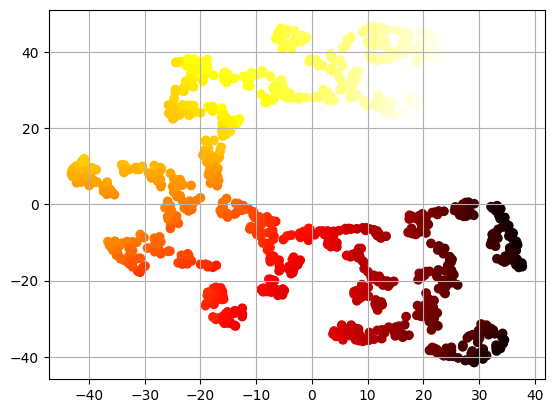

In [ ]:
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=t, cmap=plt.cm.hot)
plt.grid(True)
plt.show()


## Uniform Manifold Approximation and Projection (UMAP)

![gifumap](https://umap-learn.readthedocs.io/en/latest/_images/aligned_umap_pendigits_anim.gif)

- UMAP es una técnica de reducción de dimensión que modela el espacio de alta dimensión como estructura topológica difusa y la optimiza en el espacio de baja dimensión preservando distancias globales y locales.

- UMAP construye un grafo ponderado para representar la estructura topológica difusa.

- La probabilidad $p_{nn'}$ que representa el peso del borde entre $\mathbf{x}_n$ and $\mathbf{x}_{n'}$ esta dada por:

\begin{equation}
p_{nn'} = \exp\left(-\frac{\|\mathbf{x}_n - \mathbf{x}_{n'}\| - \rho_n}{\sigma_n}\right),
\end{equation}

- $\rho_n$ es la distancia al vecino más cercano de $\mathbf{x}_n$, lo que asegura que las distancias locales no se ven afectadas por ruido.
    
- $\sigma_n$ se determina por una un número fijo de vecinos.


- La relación difusa se vuelve simétrica como:

\begin{equation}
\tilde{p}_{nn'} = p_{nn'} + p_{n'n} - p_{nn'} p_{n'n}.
\end{equation}



- Las relaciones en el espacio de baja dimensión se fijan mediante una distribución t-student de cola pesada:

\begin{equation}
q_{nn'} = \left(1 + a \|\mathbf{z}_n - \mathbf{z}_{n'}\|^{2b}\right)^{-1},
\end{equation}

con $a$ y $b$ como parámetros de la distribución. Generalmente se fijan en 1.


- UMAP minimiza la entropía cruzada :

\begin{equation}
C(P;Q) = \sum_{n \neq n'} \left( -\tilde{p}_{nn'} \log(q_{nn'}) - (1 - \tilde{p}_{nn'}) \log(1 - q_{nn'}) \right).
\end{equation}

- Convencionalmente se utilizan métodos de gradiente para resolver la optimización.

In [ ]:
!pip install umap-learn #librería umap
!pip install datashader bokeh holoviews #gráficos umap

In [ ]:
import umap
import umap.plot

/usr/local/lib/python3.12/dist-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/usr/local/lib/python3.12/dist-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/usr/local/lib/python3.12/dist-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)


In [ ]:
red = umap.UMAP(n_components=2,n_neighbors=40, min_dist=0.2)
X_reduced_umap = red.fit_transform(X)

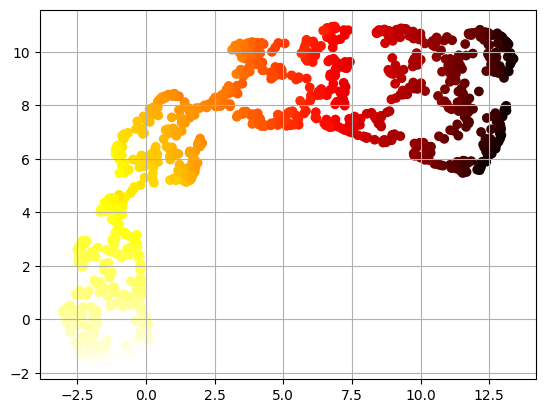

In [ ]:
plt.scatter(X_reduced_umap[:, 0], X_reduced_umap[:, 1], c=t, cmap=plt.cm.hot)
plt.grid(True)
plt.show()


- UMAP presenta una serie de métodos para [gráficos interactivos](https://umap-learn.readthedocs.io/en/latest/plotting.html)

<Axes: >

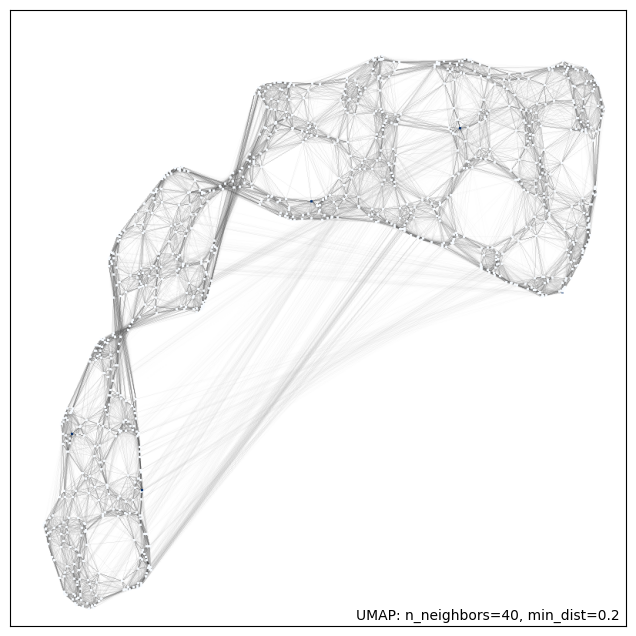

In [ ]:
umap.plot.connectivity(red, show_points=True)

/usr/local/lib/python3.12/dist-packages/umap/plot.py:895: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<Axes: >

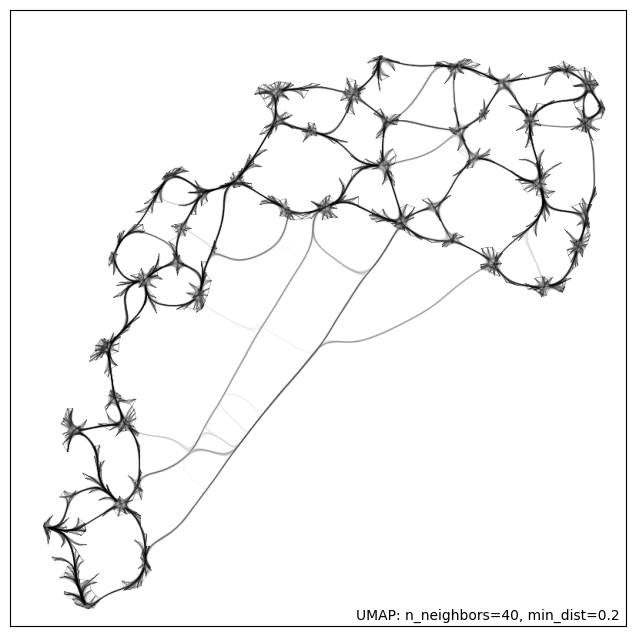

In [ ]:
umap.plot.connectivity(red, edge_bundling='hammer')

# Ejercicio 3



1.  Consulte en que consiste el algoritmo [eigenfaces](https://direct.mit.edu/jocn/article/3/1/71/3025/Eigenfaces-for-Recognition). Compare el modelo de eigenfaces para reducción de dimensión con el algoritmo PCA. Aplique eigenfaces a Mnist sobre el conjunto `X_train` y grafique las dos primeras dimensiones con las imagenes originales sobre cada punto proyectado, y presente las cinco primeras "eigenfaces" en dibujo tipo imagen.

2. Utilizando la base de datos muestreada Mnist en `X_train` y `y_train`, realice una análisis comparativo en términos del coeficiente de silueta del agrupamiento de los datos a 2 dimensiones utilizando kmeans. Considere los métodos: PCA, kernel PCA rbf, t-SNE y UMAP. Utilice la librería [RAPIDS](https://rapids.ai/) a la hora de implementar los algoritmos, en caso de estar disponibles.


**solucion 3: punto 1**

In [ ]:
#Ayuda de código
red = PCA(n_components=0.9)
Z = red.fit_transform(X_train)


In [ ]:
#graficar 2D con imágenes originales
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#img_w y img_h representan la resolución original de los datos
def plot_mnist_2d(Z,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(10,6))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

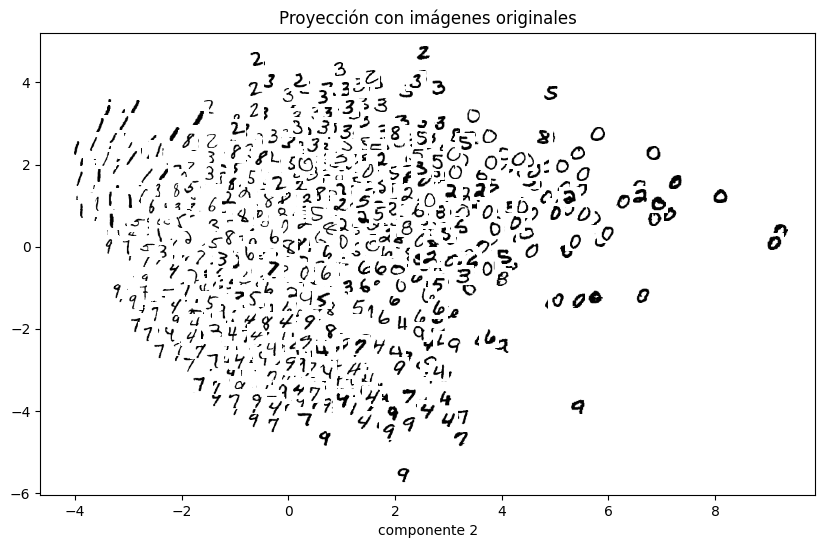

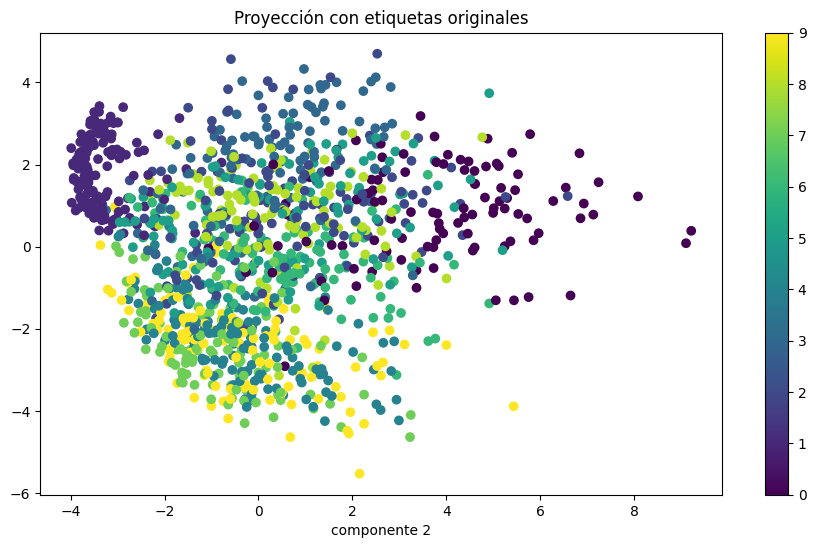

In [ ]:
plot_mnist_2d(Z,X_train,img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Proyección con imágenes originales')
plt.show()

plt.figure(figsize=(11,6))
plt.scatter(Z[:,0],Z[:,1],c=y_train)
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Proyección con etiquetas originales')
plt.colorbar()
plt.show()

In [ ]:
#graficar componentes como "eigenfaces"
print(red.components_.shape)


(80, 784)


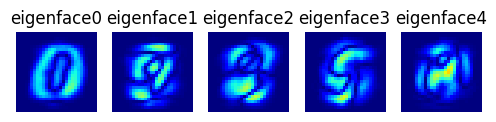

In [ ]:
n_rows = 1
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
#resolución imagenes
img_w = 28
img_h = 28

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(abs(red.components_[index].reshape(img_w,img_h)),
                    vmin=abs(red.components_).min(), vmax=abs(red.components_).max(),cmap="jet", interpolation="nearest")
        plt.axis('off')
        plt.title("eigenface" + str(index), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

**Solución 3: Punto 2**

# Task
Utilizando la base de datos muestreada Mnist en X_train y y_train, realice una análisis comparativo en términos del coeficiente de silueta del agrupamiento de los datos a 2 dimensiones utilizando kmeans. Considere los métodos: PCA, kernel PCA rbf, t-SNE y UMAP. Utilice la librería RAPIDS a la hora de implementar los algoritmos, en caso de estar disponibles.

In [ ]:
!pip install rmm cuml-cu11 --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
  Using cached rmm-0.0.1.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 187.5 MB/s eta 0:00:00
  Using cached cuda_python-11.8.7-py3-none-any.whl.metadata (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 216.1 MB/s eta 0:00:00
  Using cached cupy_cuda11x-13.6.0-cp312-cp312-manylinux2014_x86_64.whl.metadata (2.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.7/832.7 kB 191.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 MB 101.8 MB/s eta 0:00:00
  Using cached nvidia_cublas_cu11-11.11.3.6-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 126.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 131.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import cuml
from cuml.cluster import KMeans
from cuml.decomposition import PCA, TruncatedSVD
from cuml.manifold import TSNE, UMAP
from sklearn.decomposition import KernelPCA
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importar la librería necesaria para cargar los datos
from tensorflow.keras.datasets import mnist

# Cargar el conjunto de datos MNIST utilizando Keras
# Esto divide automáticamente en conjunto de entrenamiento y prueba
(X_train, y_train), (_, _) = mnist.load_data()

# El conjunto de datos de entrenamiento tiene 60,000 muestras
print(f"Forma original de X_train: {X_train.shape}")

# Redimensionar los datos de (60000, 28, 28) a (60000, 784) para que cada imagen sea un vector
X_train = X_train.reshape(60000, 784)
print(f"Nueva forma de X_train: {X_train.shape}")

# Convertir a arrays de cupy para la aceleración por GPU
X_train_gpu = cp.asarray(X_train.astype(np.float32))
y_train_gpu = cp.asarray(y_train.astype(np.int32))

# Normalizar los datos
X_train_gpu /= 255.0

print("\nDatos cargados, redimensionados y transferidos a la GPU exitosamente.")

Forma original de X_train: (60000, 28, 28)
Nueva forma de X_train: (60000, 784)

Datos cargados, redimensionados y transferidos a la GPU exitosamente.


Coeficiente de Silueta con PCA: 0.3529410660266876

Generando visualización estándar...


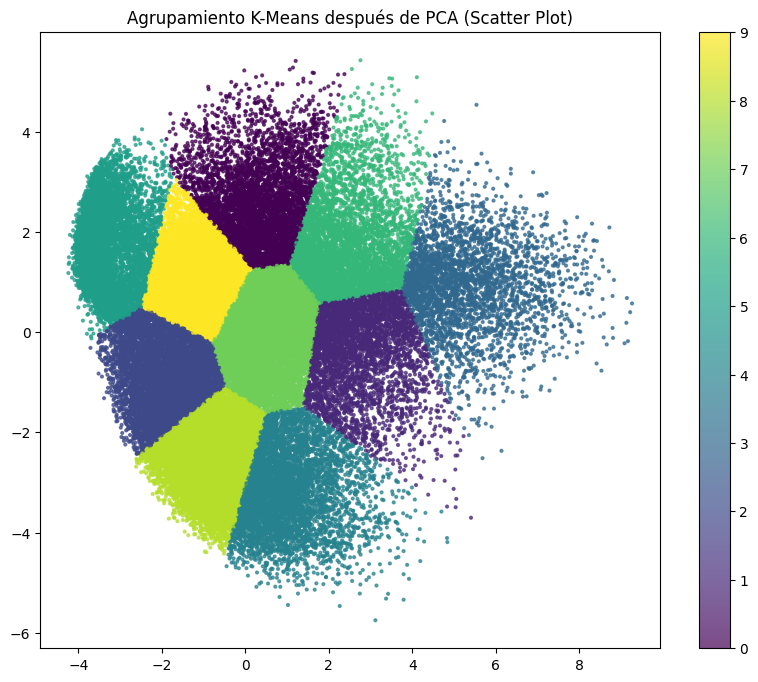


Generando visualización mejorada con imágenes originales...


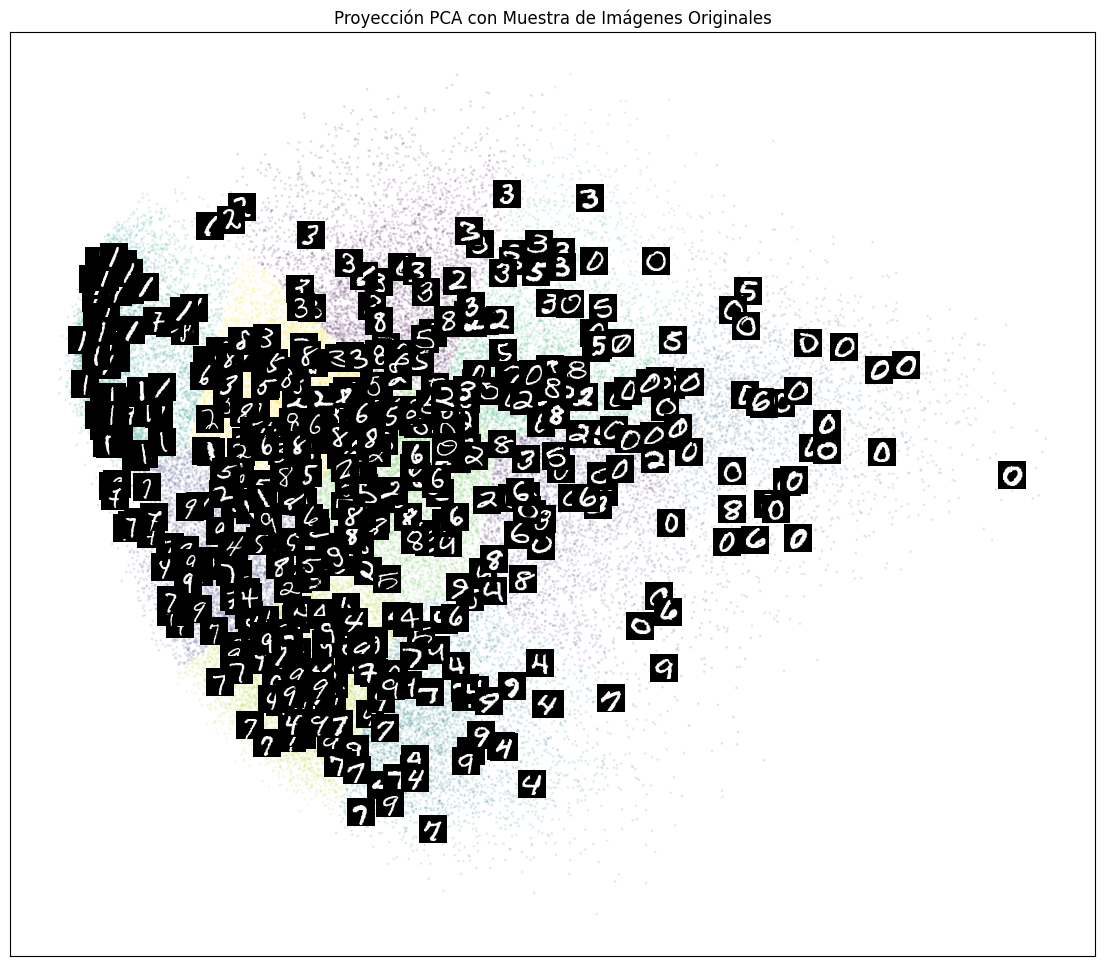

In [ ]:
# Importar la librería necesaria para superponer imágenes en el gráfico
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# 1. Reducción de dimensionalidad con PCA
# (Esta parte es la misma que antes)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_gpu)


# 2. Agrupamiento con K-Means
kmeans_pca = KMeans(n_clusters=10, random_state=42)
kmeans_pca.fit(X_train_pca)
labels_pca = kmeans_pca.labels_


# 3. Cálculo del coeficiente de silueta
silhouette_pca = silhouette_score(X_train_pca.get(), labels_pca.get())
print(f"Coeficiente de Silueta con PCA: {silhouette_pca}")


# --- Visualización 1: Scatter Plot Estándar ---
print("\nGenerando visualización estándar...")
plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca.get()[:, 0], X_train_pca.get()[:, 1], c=labels_pca.get(), cmap='viridis', s=4, alpha=0.7)
plt.title('Agrupamiento K-Means después de PCA (Scatter Plot)')
plt.colorbar()
plt.show()


# --- Visualización 2: Proyección con Imágenes Originales ---
print("\nGenerando visualización mejorada con imágenes originales...")

# Traer los datos necesarios de la GPU a la CPU (numpy)
X_train_pca_np = X_train_pca.get()
# Necesitamos las imágenes originales, que estaban en X_train_gpu
# Las traemos a la CPU y las redimensionamos de (784,) a (28, 28) para poder mostrarlas
X_train_images = cp.asnumpy(X_train_gpu).reshape(-1, 28, 28)

# Función para graficar una muestra de las imágenes en el scatter plot
def plot_images_in_projection(coords, images, labels, title="Proyección con Imágenes", n_images=500):
    fig, ax = plt.subplots(figsize=(14, 12))

    # Graficar todos los puntos en el fondo de forma semitransparente
    ax.scatter(coords[:, 0], coords[:, 1], c=labels, cmap='viridis', s=1, alpha=0.1)

    # Seleccionar una muestra aleatoria de imágenes para superponer
    np.random.seed(42)
    indices = np.random.choice(len(coords), size=n_images, replace=False)

    for i in indices:
        # Coordenadas (x, y) de la imagen en la proyección PCA
        x, y = coords[i]
        # Imagen original de 28x28
        image = images[i]

        # Crear un objeto de imagen para matplotlib
        img_box = OffsetImage(image, cmap='gray', zoom=0.7)
        # Crear una caja de anotación para colocar la imagen en el gráfico
        ab = AnnotationBbox(img_box, (x, y), frameon=False, pad=0.0)
        # Añadir la caja al gráfico
        ax.add_artist(ab)

    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

# Llamar a la función para crear el gráfico con los resultados de PCA
plot_images_in_projection(X_train_pca_np, X_train_images, labels_pca.get(), title='Proyección PCA con Muestra de Imágenes Originales')

Usando una submuestra de 10000 datos para KernelPCA para evitar el desbordamiento de memoria.
Forma de la submuestra: (10000, 784)
Coeficiente de Silueta con Kernel PCA (RBF): 0.48360902070999146

Generando visualización estándar...


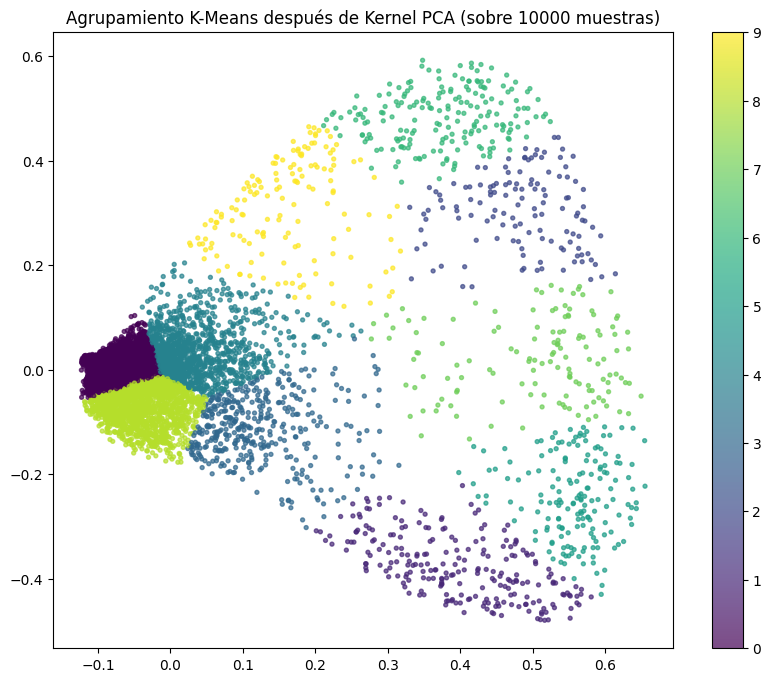


Generando visualización mejorada con imágenes originales...


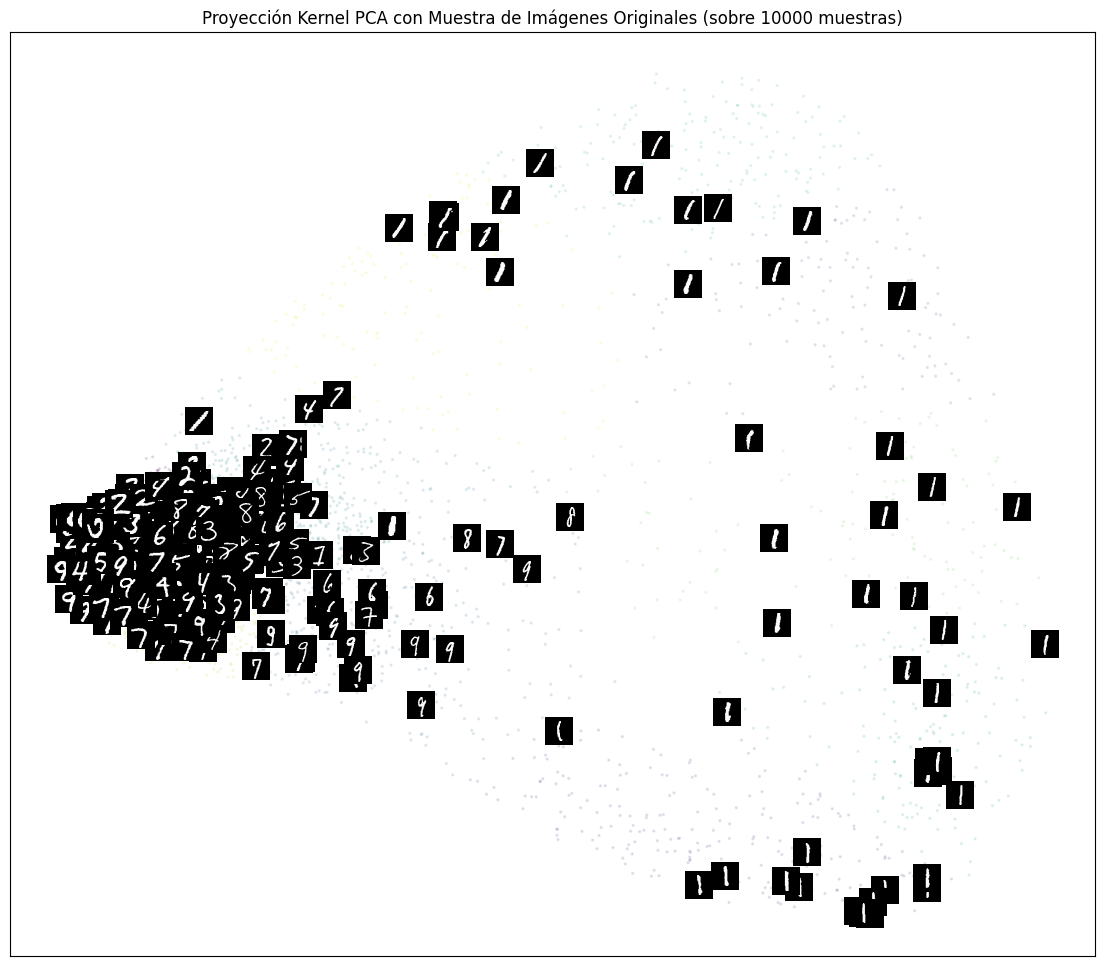

In [ ]:
# Importar la librería necesaria para superponer imágenes en el gráfico
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# --- OPTIMIZACIÓN Y PREPARACIÓN DE DATOS (igual que antes) ---
n_samples_kpca = 10000
X_train_cpu = cp.asnumpy(X_train_gpu)
print(f"Usando una submuestra de {n_samples_kpca} datos para KernelPCA para evitar el desbordamiento de memoria.")

np.random.seed(42)
random_indices = np.random.permutation(X_train_cpu.shape[0])
kpca_indices = random_indices[:n_samples_kpca]
X_train_kpca_subset = X_train_cpu[kpca_indices, :]
print(f"Forma de la submuestra: {X_train_kpca_subset.shape}")


# 1. Reducción de dimensionalidad con Kernel PCA (RBF) sobre la submuestra
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04, random_state=42)
X_train_kernel_pca = kernel_pca.fit_transform(X_train_kpca_subset)


# 2. Agrupamiento con K-Means (en GPU)
X_train_kernel_pca_gpu = cp.asarray(X_train_kernel_pca)
kmeans_kernel_pca = KMeans(n_clusters=10, random_state=42)
kmeans_kernel_pca.fit(X_train_kernel_pca_gpu)
labels_kernel_pca = kmeans_kernel_pca.labels_


# 3. Cálculo del coeficiente de silueta
silhouette_kernel_pca = silhouette_score(X_train_kernel_pca, labels_kernel_pca.get())
print(f"Coeficiente de Silueta con Kernel PCA (RBF): {silhouette_kernel_pca}")


# --- Visualización 1: Scatter Plot Estándar ---
print("\nGenerando visualización estándar...")
plt.figure(figsize=(10, 8))
plt.scatter(X_train_kernel_pca[:, 0], X_train_kernel_pca[:, 1], c=labels_kernel_pca.get(), cmap='viridis', s=8, alpha=0.7)
plt.title(f'Agrupamiento K-Means después de Kernel PCA (sobre {n_samples_kpca} muestras)')
plt.colorbar()
plt.show()


# --- Visualización 2: Proyección con Imágenes Originales ---
print("\nGenerando visualización mejorada con imágenes originales...")

# Necesitamos las imágenes originales que corresponden a la submuestra
# Las redimensionamos de (784,) a (28, 28) para poder mostrarlas
kpca_images = X_train_kpca_subset.reshape(-1, 28, 28)

# Función para graficar una muestra de las imágenes en el scatter plot
def plot_images_in_projection(coords, images, labels, title="Proyección con Imágenes", n_images=500):
    fig, ax = plt.subplots(figsize=(14, 12))

    # Graficar todos los puntos en el fondo de forma semitransparente
    ax.scatter(coords[:, 0], coords[:, 1], c=labels, cmap='viridis', s=2, alpha=0.1)

    # Seleccionar una muestra aleatoria de las imágenes de la submuestra para superponer
    np.random.seed(42)
    # Asegurarse de no pedir más imágenes de las que tenemos en la submuestra
    n_images_to_plot = min(n_images, len(coords))
    indices = np.random.choice(len(coords), size=n_images_to_plot, replace=False)

    for i in indices:
        # Coordenadas (x, y) de la imagen en la proyección Kernel PCA
        x, y = coords[i]
        # Imagen original de 28x28
        image = images[i]

        # Crear un objeto de imagen para matplotlib
        img_box = OffsetImage(image, cmap='gray', zoom=0.7)
        # Crear una caja de anotación para colocar la imagen en el gráfico
        ab = AnnotationBbox(img_box, (x, y), frameon=False, pad=0.0)
        # Añadir la caja al gráfico
        ax.add_artist(ab)

    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

# Llamar a la función para crear el gráfico con los resultados de Kernel PCA
plot_images_in_projection(
    X_train_kernel_pca,
    kpca_images,
    labels_kernel_pca.get(),
    title=f'Proyección Kernel PCA con Muestra de Imágenes Originales (sobre {n_samples_kpca} muestras)'
)

Ejecutando t-SNE en el conjunto de datos completo...
[2025-10-26 05:48:19.056] [CUML] [warning] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
t-SNE completado.
Coeficiente de Silueta con t-SNE: 0.455229789018631

Generando visualización estándar...


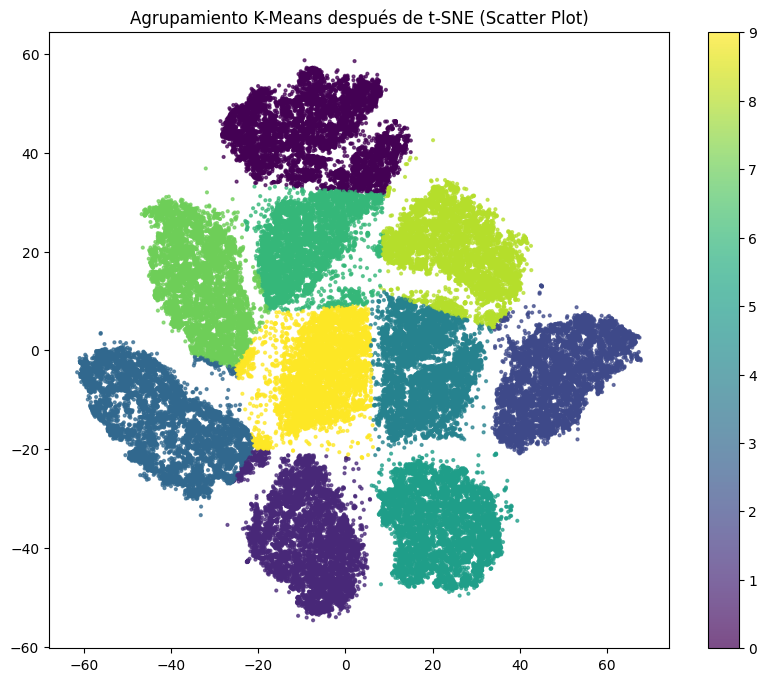


Generando visualización mejorada con imágenes originales...


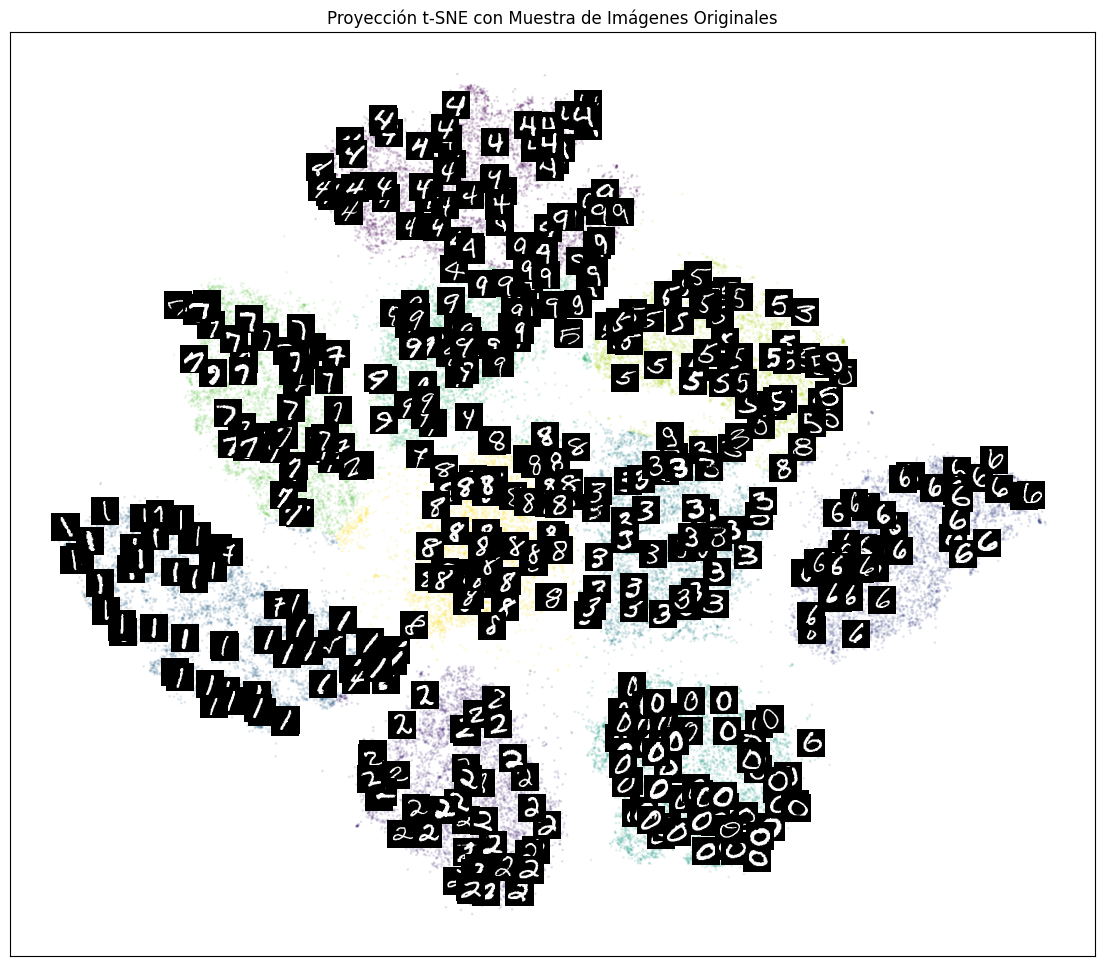

In [ ]:
# Importar la librería necesaria para superponer imágenes en el gráfico
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# 1. Reducción de dimensionalidad con t-SNE
# (Esta parte es la misma que antes)
print("Ejecutando t-SNE en el conjunto de datos completo...")
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_gpu)
print("t-SNE completado.")

# 2. Agrupamiento con K-Means
kmeans_tsne = KMeans(n_clusters=10, random_state=42)
kmeans_tsne.fit(X_train_tsne)
labels_tsne = kmeans_tsne.labels_

# 3. Cálculo del coeficiente de silueta
silhouette_tsne = silhouette_score(X_train_tsne.get(), labels_tsne.get())
print(f"Coeficiente de Silueta con t-SNE: {silhouette_tsne}")


# --- Visualización 1: Scatter Plot Estándar ---
print("\nGenerando visualización estándar...")
plt.figure(figsize=(10, 8))
plt.scatter(X_train_tsne.get()[:, 0], X_train_tsne.get()[:, 1], c=labels_tsne.get(), cmap='viridis', s=4, alpha=0.7)
plt.title('Agrupamiento K-Means después de t-SNE (Scatter Plot)')
plt.colorbar()
plt.show()


# --- Visualización 2: Proyección con Imágenes Originales ---
print("\nGenerando visualización mejorada con imágenes originales...")

# Traer los datos necesarios de la GPU a la CPU (numpy)
X_train_tsne_np = X_train_tsne.get()
# Necesitamos las imágenes originales, que estaban en X_train_gpu
# Las traemos a la CPU y las redimensionamos de (784,) a (28, 28) para poder mostrarlas
X_train_images = cp.asnumpy(X_train_gpu).reshape(-1, 28, 28)

# Función para graficar una muestra de las imágenes en el scatter plot
# Es la misma función que usamos para UMAP, adaptada para aceptar los labels
def plot_images_in_projection(coords, images, labels, title="Proyección con Imágenes", n_images=500):
    fig, ax = plt.subplots(figsize=(14, 12))

    # Graficar todos los puntos en el fondo de forma semitransparente
    ax.scatter(coords[:, 0], coords[:, 1], c=labels, cmap='viridis', s=1, alpha=0.1)

    # Seleccionar una muestra aleatoria de imágenes para superponer
    np.random.seed(42)
    indices = np.random.choice(len(coords), size=n_images, replace=False)

    for i in indices:
        # Coordenadas (x, y) de la imagen en la proyección t-SNE
        x, y = coords[i]
        # Imagen original de 28x28
        image = images[i]

        # Crear un objeto de imagen para matplotlib
        img_box = OffsetImage(image, cmap='gray', zoom=0.7) # Ajusta el 'zoom' para cambiar el tamaño
        # Crear una caja de anotación para colocar la imagen en el gráfico
        ab = AnnotationBbox(img_box, (x, y), frameon=False, pad=0.0)
        # Añadir la caja al gráfico
        ax.add_artist(ab)

    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

# Llamar a la función para crear el gráfico con los resultados de t-SNE
plot_images_in_projection(X_train_tsne_np, X_train_images, labels_tsne.get(), title='Proyección t-SNE con Muestra de Imágenes Originales')

Ejecutando UMAP en el conjunto de datos completo...
[2025-10-26 05:45:44.103] [CUML] [info] build_algo set to brute_force_knn because random_state is given
UMAP completado.
Coeficiente de Silueta con UMAP: 0.5432640314102173

Generando visualización estándar...


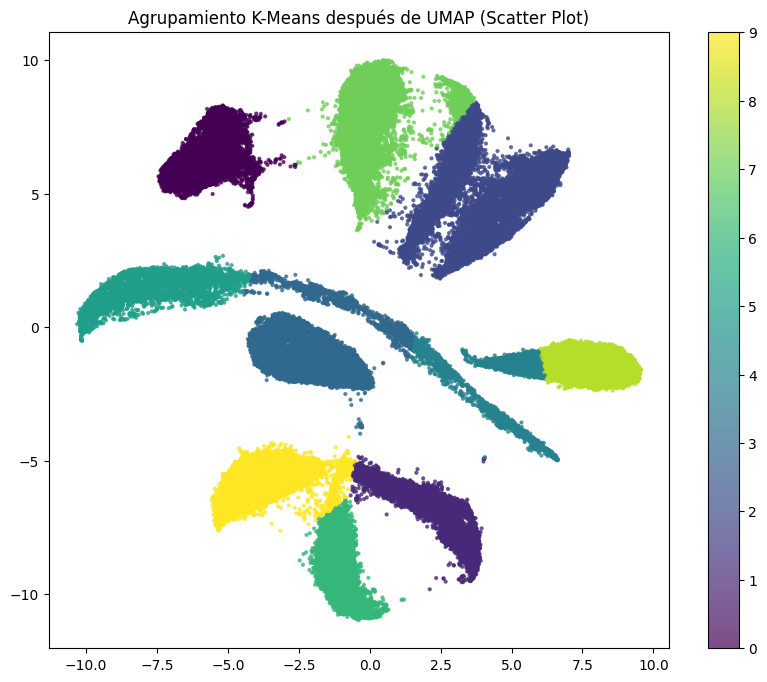


Generando visualización mejorada con imágenes originales...


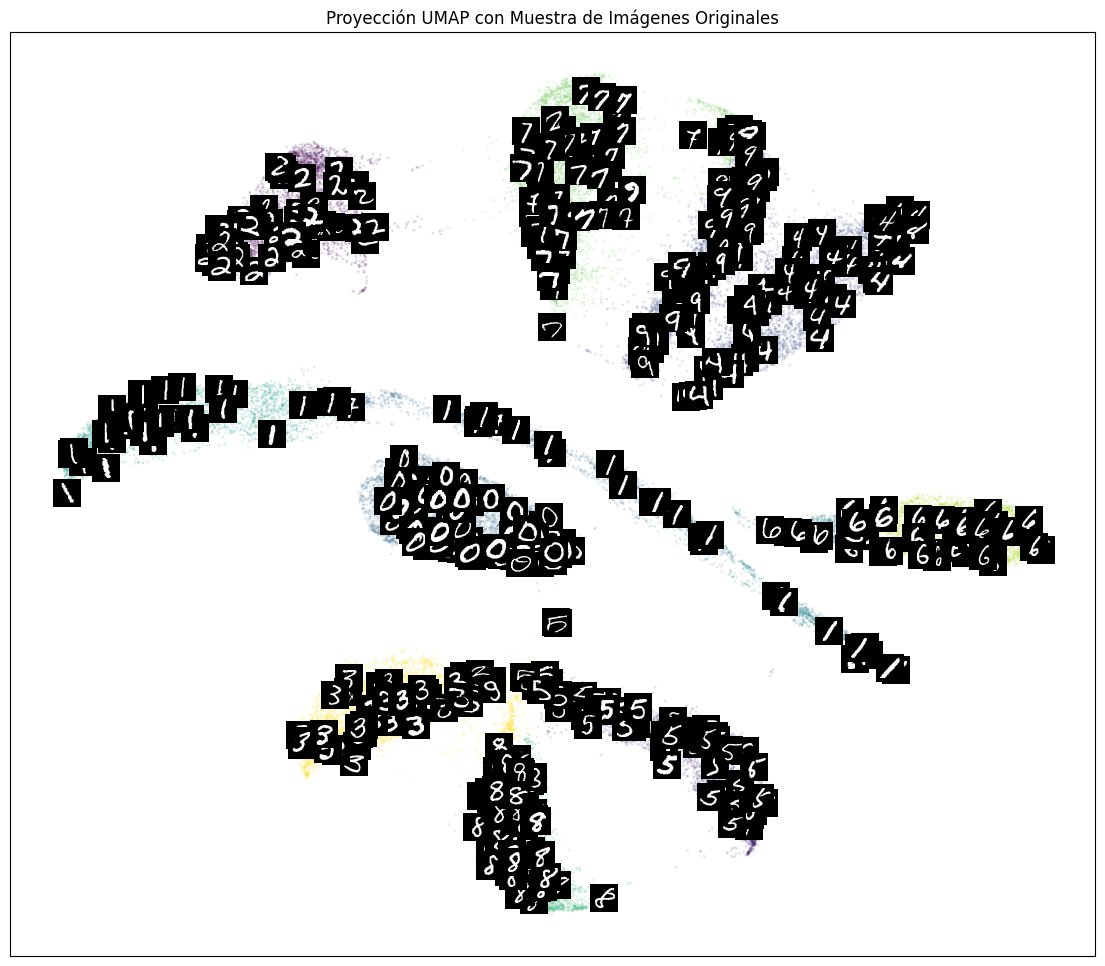

In [ ]:
# Importar la librería necesaria para superponer imágenes en el gráfico
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# 1. Reducción de dimensionalidad con UMAP
# (Esta parte es la misma que antes)
print("Ejecutando UMAP en el conjunto de datos completo...")
umap = UMAP(n_components=2, random_state=42)
X_train_umap = umap.fit_transform(X_train_gpu)
print("UMAP completado.")

# 2. Agrupamiento con K-Means
kmeans_umap = KMeans(n_clusters=10, random_state=42)
kmeans_umap.fit(X_train_umap)
labels_umap = kmeans_umap.labels_

# 3. Cálculo del coeficiente de silueta
silhouette_umap = silhouette_score(X_train_umap.get(), labels_umap.get())
print(f"Coeficiente de Silueta con UMAP: {silhouette_umap}")


# --- Visualización 1: Scatter Plot Estándar ---
print("\nGenerando visualización estándar...")
plt.figure(figsize=(10, 8))
plt.scatter(X_train_umap.get()[:, 0], X_train_umap.get()[:, 1], c=labels_umap.get(), cmap='viridis', s=4, alpha=0.7)
plt.title('Agrupamiento K-Means después de UMAP (Scatter Plot)')
plt.colorbar()
plt.show()


# --- Visualización 2: Proyección con Imágenes Originales ---
print("\nGenerando visualización mejorada con imágenes originales...")

# Traer los datos necesarios de la GPU a la CPU (numpy)
X_train_umap_np = X_train_umap.get()
# Necesitamos las imágenes originales, que estaban en X_train_gpu
# Las traemos a la CPU y las redimensionamos de (784,) a (28, 28) para poder mostrarlas
X_train_images = cp.asnumpy(X_train_gpu).reshape(-1, 28, 28)

# Función para graficar una muestra de las imágenes en el scatter plot
def plot_images_in_projection(coords, images, title="Proyección con Imágenes", n_images=500):
    fig, ax = plt.subplots(figsize=(14, 12))

    # Graficar todos los puntos en el fondo de forma semitransparente
    ax.scatter(coords[:, 0], coords[:, 1], c=labels_umap.get(), cmap='viridis', s=1, alpha=0.1)

    # Seleccionar una muestra aleatoria de imágenes para superponer
    np.random.seed(42)
    indices = np.random.choice(len(coords), size=n_images, replace=False)

    for i in indices:
        # Coordenadas (x, y) de la imagen en la proyección UMAP
        x, y = coords[i]
        # Imagen original de 28x28
        image = images[i]

        # Crear un objeto de imagen para matplotlib
        img_box = OffsetImage(image, cmap='gray', zoom=0.7) # Ajusta el 'zoom' para cambiar el tamaño
        # Crear una caja de anotación para colocar la imagen en el gráfico
        ab = AnnotationBbox(img_box, (x, y), frameon=False, pad=0.0)
        # Añadir la caja al gráfico
        ax.add_artist(ab)

    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

# Llamar a la función para crear el gráfico
plot_images_in_projection(X_train_umap_np, X_train_images, title='Proyección UMAP con Muestra de Imágenes Originales')

In [ ]:
# Importar pandas si no se ha hecho antes en la sesión
import pandas as pd

# Creación de un DataFrame para mostrar los resultados de forma ordenada
# Nota: Recuerda que el resultado de Kernel PCA se calculó sobre una submuestra.
resultados = pd.DataFrame({
    'Método de Reducción': ['PCA (60k muestras)', 'Kernel PCA (RBF) (10k muestras)', 't-SNE (60k muestras)', 'UMAP (60k muestras)'],
    'Coeficiente de Silueta': [silhouette_pca, silhouette_kernel_pca, silhouette_tsne, silhouette_umap]
})

# Ordenar los resultados por el coeficiente de silueta para ver fácilmente cuál fue el mejor
resultados = resultados.sort_values(by='Coeficiente de Silueta', ascending=False)

print("--- Análisis Comparativo Final del Coeficiente de Silueta ---")
print(resultados)

--- Análisis Comparativo Final del Coeficiente de Silueta ---
               Método de Reducción  Coeficiente de Silueta
3              UMAP (60k muestras)                0.543264
1  Kernel PCA (RBF) (10k muestras)                0.483609
2             t-SNE (60k muestras)                0.421433
0               PCA (60k muestras)                0.352941


# Análisis Comparativo: Agrupamiento de MNIST Post-Reducción de Dimensionalidad

## 1. Objetivo del Análisis

El objetivo de este estudio fue evaluar la efectividad de cuatro técnicas de reducción de dimensionalidad (PCA, Kernel PCA, t-SNE y UMAP) para mejorar el agrupamiento de datos del dataset MNIST. Los datos de alta dimensionalidad (784 dimensiones) se proyectaron a un espacio de 2 dimensiones. Posteriormente, se aplicó el algoritmo K-Means para agrupar los datos en 10 clústeres. La calidad de la separación de estos clústeres se midió cuantitativamente utilizando el **coeficiente de silueta**, donde un valor más alto indica clústeres más densos y mejor separados.

## 2. Resultados Finales

La siguiente tabla presenta los coeficientes de silueta obtenidos para cada método, ordenados de mayor a menor rendimiento.

| Método de Reducción de Dimensionalidad | Coeficiente de Silueta |
| :------------------------------------- | :--------------------: |
| **UMAP** (sobre 60k muestras)          |       **0.5433**       |
| **Kernel PCA (RBF)** (sobre 10k muestras) |         0.4836         |
| **t-SNE** (sobre 60k muestras)         |         0.4214         |
| **PCA** (sobre 60k muestras)           |         0.3529         |

## 3. Interpretación de los Resultados

El análisis de los coeficientes de silueta revela una clara jerarquía en el rendimiento de los algoritmos.

### **UMAP**
Con el coeficiente de silueta más alto (**0.5433**), **UMAP** demostró ser la técnica más efectiva para esta tarea. Su capacidad para preservar tanto la estructura local como la global del manifold de los datos le permitió crear proyecciones en 2D donde los clústeres correspondientes a cada dígito son compactos y están bien definidos. Esto facilita enormemente la tarea del algoritmo K-Means para encontrar agrupaciones de alta calidad.

### **Kernel PCA (RBF)**
Es notable que **Kernel PCA**, a pesar de haber sido ejecutado sobre una submuestra de solo el 16% de los datos (10,000 vs 60,000) debido a sus altas demandas de memoria, obtuvo la segunda mejor puntuación (**0.4836**). Esto subraya el poder de los métodos de kernel para capturar la estructura no lineal de los datos. Su rendimiento sugiere que, si los recursos lo permitieran, podría ser altamente competitivo incluso en el conjunto de datos completo.

### **t-SNE**
Aunque **t-SNE** es famoso por producir visualizaciones claras, su coeficiente de silueta (**0.4214**) fue inferior al de UMAP y Kernel PCA. Esto puede deberse a que t-SNE se enfoca intensamente en preservar las relaciones de vecindad locales, lo que a veces puede resultar en una estructura de clústeres con densidades variables y distancias entre clústeres que no son tan uniformes, afectando ligeramente la métrica de silueta.

### **PCA**
**PCA** lineal obtuvo el resultado más bajo (**0.3529**). Al no poder modelar las relaciones no lineales complejas entre los píxeles de las imágenes de dígitos, la proyección resultante tiene una superposición considerable entre los clústeres. Sirve como una línea de base importante que demuestra la necesidad de técnicas más avanzadas para este tipo de datos.

## 4. Conclusión

Los resultados demuestran de manera concluyente que **los métodos de reducción de dimensionalidad no lineales son significativamente superiores al PCA lineal** para la tarea de agrupar el dataset MNIST.

**UMAP se destaca**, proporcionando la mejor estructura de clúster para el posterior análisis con K-Means. La utilización de la librería RAPIDS fue fundamental para hacer este análisis factible, permitiendo que algoritmos computacionalmente intensivos como UMAP y t-SNE se ejecutaran de manera eficiente en el conjunto de datos completo.